# Evil Geniuses - Data Analytics Intern Assessment 

### Simple Pre-Processing and EDA

In [1]:
#pip install pandas-profiling

In [2]:
import pandas as pd 
import pandas_profiling as pp
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

<ipython-input-2-12dc4b8ddfc2>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [3]:
df = pd.read_excel('/Users/yuniverse/Downloads/social_data.xlsx')
len(df)

3479

In [4]:
#check duplicated rows
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

47

In [5]:
#drop duplicated rows 
df= df.drop_duplicates(keep = 'first')

In [6]:
len(df)

3432

In [7]:
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [8]:
df[df.Account == 'General']

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
167,2023-03-29 11:01:11.963,General,LINKEDIN_COMPANY,Community Engagement,888,23,Video
379,2023-03-24 17:57:00.799,General,LINKEDIN_COMPANY,Community Engagement,933,16,Photo
381,2023-03-24 13:54:50.669,General,LINKEDIN_COMPANY,Community Engagement,2026,48,Video
382,2023-03-24 13:54:17.193,General,LINKEDIN_COMPANY,Community Engagement,917,12,Photo
420,2023-03-23 13:39:18.562,General,LINKEDIN_COMPANY,Evil Exhibited,3859,124,Link
472,2023-03-22 10:59:24.126,General,LINKEDIN_COMPANY,Community Engagement,2046,45,Photo
611,2023-03-17 12:17:44.202,General,LINKEDIN_COMPANY,Community Engagement,3358,133,Photo
719,2023-03-14 14:11:42.472,General,LINKEDIN_COMPANY,Community Engagement,1433,27,Photo
725,2023-03-14 13:52:30.468,General,LINKEDIN_COMPANY,Community Engagement,2754,42,Photo
760,2023-03-13 11:30:55.161,General,LINKEDIN_COMPANY,Community Engagement,1593,33,Photo


In [9]:
df.dtypes

Published Date       datetime64[ns]
Account                      object
Account Type                 object
Campaign Name                object
Total Impressions             int64
Total Engagements             int64
Media Type                   object
dtype: object

In [10]:
#profile = pp.ProfileReport(df)
#profile.to_file("/Users/yuniverse/Downloads/output.html") # basic EDA Report file 

# <span style='color: black'> Question 1: What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate? </span>

In [11]:
df = df[df['Total Impressions'] !=0]

df['Engagement rate'] = df['Total Engagements']/df['Total Impressions'] *100

df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement rate
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo,4.410202
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video,17.192041
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video,10.429581
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo,21.341399


In [12]:
df['Engagement rate'].value_counts()

0.000000     222
2.150538       5
1.388889       4
3.225806       4
5.000000       4
            ... 
1.938537       1
16.254015      1
2.352509       1
1.429550       1
1.600800       1
Name: Engagement rate, Length: 2420, dtype: int64

In [13]:
typical_engagement = (df['Total Engagements'].sum()/df['Total Impressions'].sum()) * 100
print("The typical engagement rate is : ",typical_engagement,'%')
likelihood = len(df[df['Engagement rate'] >=15])/len(df)
print("The likelihood of achieving a 15% engagement rate is:", likelihood)

The typical engagement rate is :  8.513384643159984 %
The likelihood of achieving a 15% engagement rate is: 0.08020603384841796


### Answer 1: <br />The typical engagement rate is  <span style='color:green'> 8.5%</span>. The likelihood of achieving a 15% engagement rate is about  <span style='color:green'> 0.08</span>

# Question 2: Does day of the week and time of posting affect engagement rates?

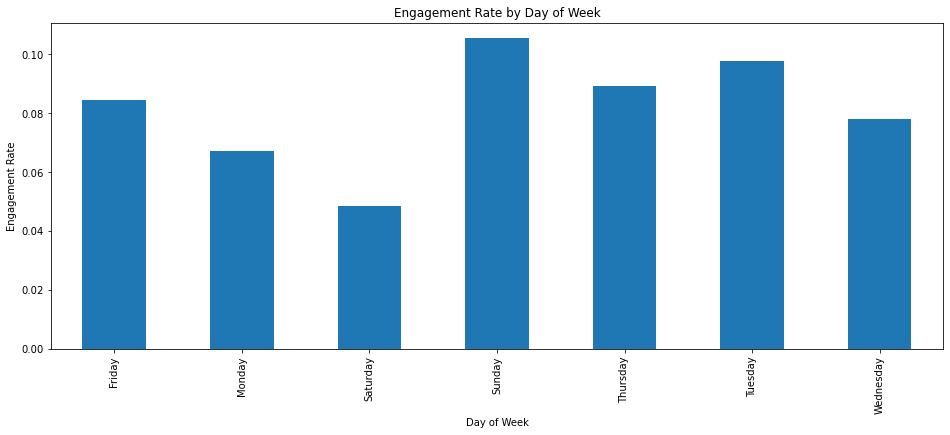

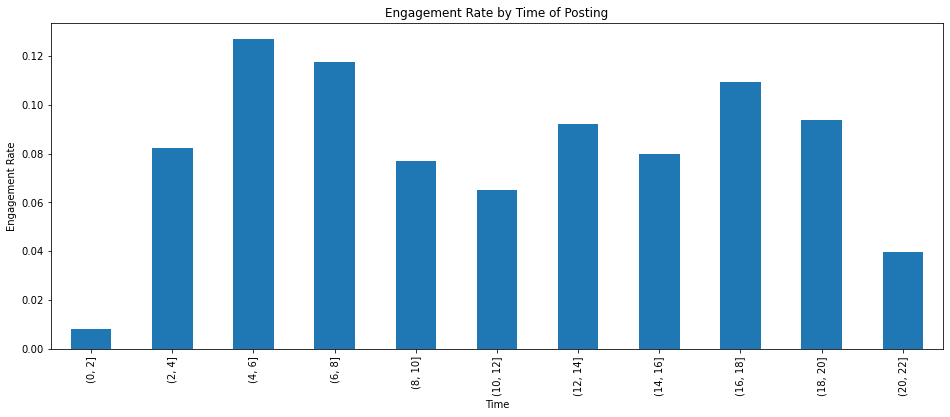

In [14]:
df['Published Date'] = pd.to_datetime(df['Published Date'])  # convert to datetime format
df['Day of Week'] = df['Published Date'].dt.day_name()  # extract day of the week
df['Time'] = df['Published Date'].dt.time  # extract time component
df['Hour'] = df['Published Date'].dt.hour # extract hour component
df['Time Group'] = pd.cut(df['Hour'], bins=range(0, 24, 2))

# Explore engagement rates based on the day of the week
engagement_by_day = df.groupby('Day of Week')['Total Engagements'].sum()/df.groupby('Day of Week')['Total Impressions'].sum()
engagement_by_day.plot(kind='bar',figsize=(16, 6))

plt.xlabel('Day of Week')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Day of Week')
plt.show()

# Explore engagement rates based on time of posting
engagement_by_time = df.groupby(['Time Group'])['Total Engagements'].sum()/df.groupby(['Time Group'])['Total Impressions'].sum()
engagement_by_time.plot(kind='bar', figsize=(16, 6))

plt.xlabel('Time')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Time of Posting')
plt.show()


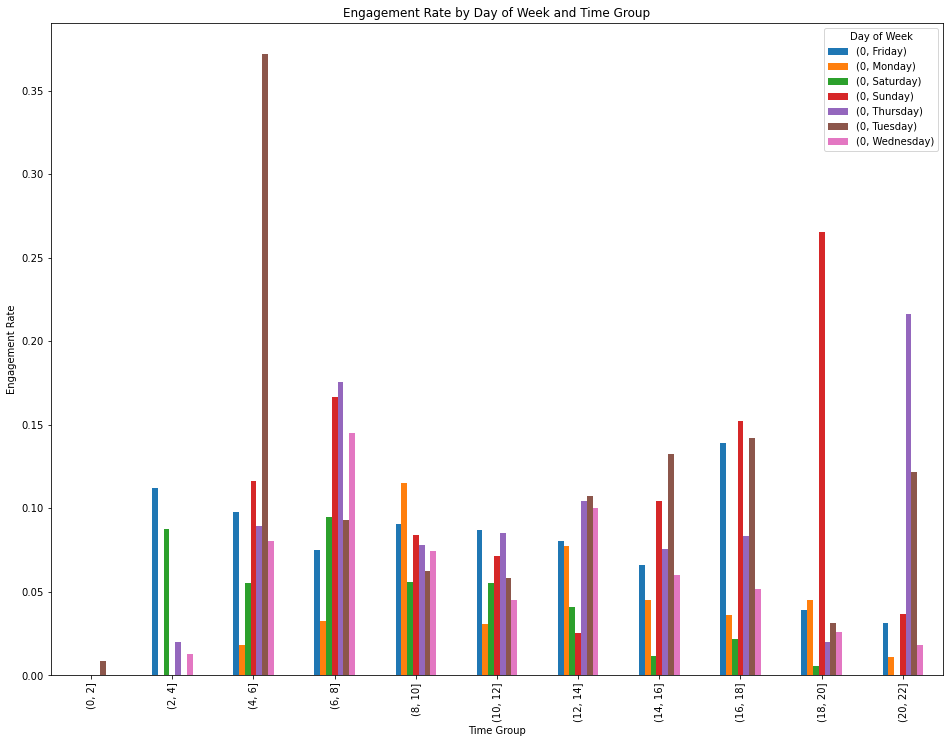

In [15]:

# Calculate mean engagement rates by day of the week and time group
engagement_by_time_group = df.groupby(['Day of Week', 'Time Group'])['Total Engagements'].sum()/df.groupby(['Day of Week','Time Group'])['Total Impressions'].sum()
engagement_by_time_group = engagement_by_time_group.reset_index()

fig, ax = plt.subplots(figsize=(16, 12)) # change the scale of the plot
engagement_by_time_group.pivot('Time Group', 'Day of Week').plot(kind='bar', ax=ax)
plt.xlabel('Time Group')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Day of Week and Time Group')
plt.legend(title='Day of Week', bbox_to_anchor=(1, 1))
plt.show()

In [16]:
# take a look at the skyrocket-high value from the above plot 
engagement_by_time_group = engagement_by_time_group.rename(columns={0: 'Engagement Rate'})
engagement_by_time_group[engagement_by_time_group['Engagement Rate'] ==engagement_by_time_group['Engagement Rate'].max()]

,Day of Week,Time Group,Engagement Rate
57,Tuesday,"(4, 6]",0.371877


#### As we can see, the pattern from the plots above showed that different days and time should effect the engagement rate. Now, we are going to apply statistical test to test out the relationship between these two indexes

In [17]:
engagement_by_time_group['Engagement Rate'] = engagement_by_time_group['Engagement Rate'].fillna(0)
engagement_by_time_group.columns = ['Day_of_Week', 'Time_Group', 'Engagement_Rate']

In [18]:
engagement_by_time_group

,Day_of_Week,Time_Group,Engagement_Rate
0,Friday,"(0, 2]",0.000000
1,Friday,"(2, 4]",0.112266
2,Friday,"(4, 6]",0.097793
3,Friday,"(6, 8]",0.074793
4,Friday,"(8, 10]",0.090449
...,...,...,...
72,Wednesday,"(12, 14]",0.099969
73,Wednesday,"(14, 16]",0.060039
74,Wednesday,"(16, 18]",0.051944
75,Wednesday,"(18, 20]",0.025979


In [19]:
import statsmodels.api as sm # using ANOVA test out the statistical significance
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('Engagement_Rate ~ C(Day_of_Week) + C(Time_Group)', data=engagement_by_time_group).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Two-way ANOVA Results:")
print(anova_table)

Two-way ANOVA Results:
                  sum_sq    df         F    PR(>F)
C(Day_of_Week)  0.045107   6.0  2.364531  0.040756
C(Time_Group)   0.076266  10.0  2.398708  0.018070
Residual        0.190767  60.0       NaN       NaN


#### we can see the P-values of both day of week and time group are smallar than 0.05. We can conclude that these two variables affect the engagement rate siginificantly 

### Answer 2: <br /><span style='color:green'> Yes.</span> From the analysis result above, we conclude that day of the week and time of posting affect engagement rates.

# Question 3: How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

In [20]:
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement rate,Day of Week,Time,Hour,Time Group
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628,Friday,19:43:42.590000,19,"(18, 20]"
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo,4.410202,Friday,19:40:57.383000,19,"(18, 20]"
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video,17.192041,Friday,19:23:57.349000,19,"(18, 20]"
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video,10.429581,Friday,18:55:51.855000,18,"(16, 18]"
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo,21.341399,Friday,18:36:01,18,"(16, 18]"


In [21]:
df['Account'].value_counts()

General             1731
DOTA2                698
CSGO                 198
Content Creators      35
Valorant              34
General               22
Name: Account, dtype: int64

In [22]:
# we noticed that there are two unique values as 'General'
unique_accounts = df['Account'].unique()
print(unique_accounts)

['CSGO' 'General ' 'DOTA2' 'Content Creators' 'Valorant' 'General']


In [23]:
len(df[df['Account'] == 'General']), len(df[df['Account'] == 'General'])

(22, 22)

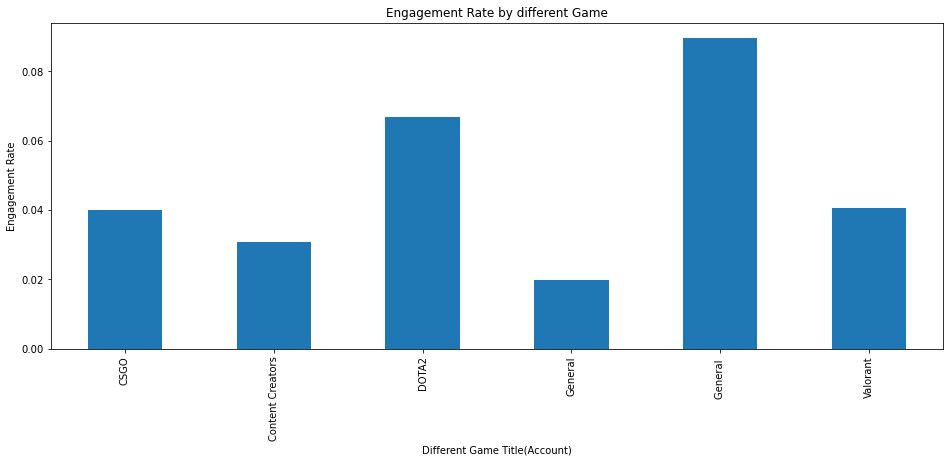

In [24]:
engagement_by_campaign = df.groupby('Account')['Total Engagements'].sum()/df.groupby('Account')['Total Impressions'].sum()
engagement_by_campaign.plot(kind='bar',figsize=(16, 6))

plt.xlabel('Different Game Title(Account)')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by different Game')
plt.show()



### Answer 3: <br /> As we can see from the visualization above, different game titles lead to different engagement rate. game titled <span style='color:green'>'General'</span> has the highest engagement rate. If 'General' is a game title, we should focus more on the game title with 'General'. If 'General' means a general category and no further information on the specific game title, we should focus more on  <span style='color:green'>'DOTA2' </span> since  'DOTA2' has the second highest engagement rate.


# Question 4: What media type performs the best?

In [25]:
df['Media Type'].value_counts()

Photo       1228
Video        886
Text         548
Link          41
Carousel       9
Mixed          5
Album          1
Name: Media Type, dtype: int64

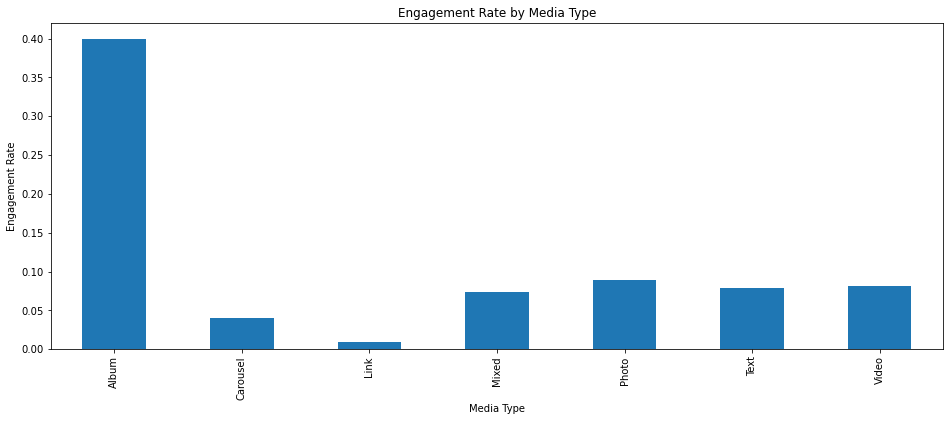

In [26]:
engagement_by_campaign = df.groupby('Media Type')['Total Engagements'].sum()/df.groupby('Media Type')['Total Impressions'].sum()
engagement_by_campaign.plot(kind='bar',figsize=(16, 6))

plt.xlabel('Media Type')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Media Type')
plt.show()

#### From the graph above, we found that 'Album' type has the best perfromance. But there are only 1 datapoint of the album category, the result could be biased.

In [27]:
df[df['Media Type'] == 'Album']


,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement rate,Day of Week,Time,Hour,Time Group
3221,2023-01-19 06:02:22,General,FBPAGE,N/A,20,8,Album,40.0,Thursday,06:02:22,6,"(4, 6]"


In [28]:
#just drop this row
df.drop(3221, inplace=True)

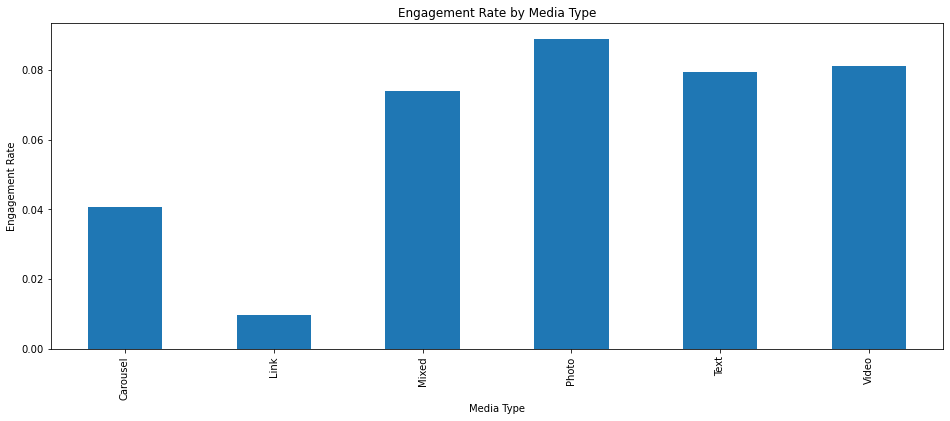

In [29]:
engagement_by_campaign = df.groupby('Media Type')['Total Engagements'].sum()/df.groupby('Media Type')['Total Impressions'].sum()
engagement_by_campaign.plot(kind='bar',figsize=(16, 6))

plt.xlabel('Media Type')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Media Type')
plt.show()

### Answer 4: <br /> The media type 'album' has the highest performance. But since there is only one valuable data point of the media type 'album', the result could be biased. If we exculde 'album', the media type <span style='color:green'> 'Photo' </span>  now has the best performance. We conclude  <span style='color:green'>the media type 'Photo' </span> has the highest performance.

# Question 5: What is our best performing campaign?

In [30]:
df['Campaign Name'].value_counts()

Community Engagement     1369
N/A                       796
Evil Exhibited            391
Evergreen                 161
Name: Campaign Name, dtype: int64

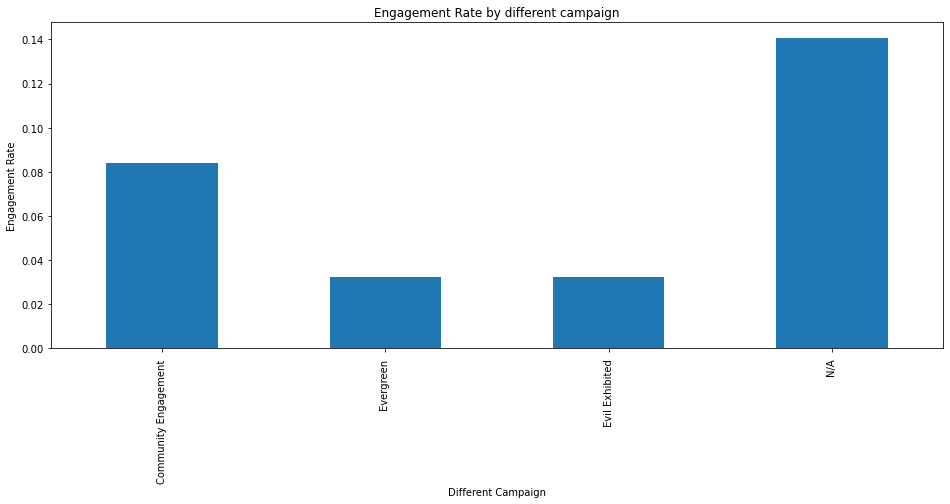

In [31]:
engagement_by_campaign = df.groupby('Campaign Name')['Total Engagements'].sum()/df.groupby('Campaign Name')['Total Impressions'].sum()
engagement_by_campaign.plot(kind='bar',figsize=(16, 6))

plt.xlabel('Different Campaign')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by different campaign')
plt.show()


### Answer 5: <br /> From the visulization result, we can see that <span style='color:green'> 'Community Engagement'</span> has the best performance.

In [32]:
df['Media Type'].value_counts()

Photo       1228
Video        886
Text         548
Link          41
Carousel       9
Mixed          5
Name: Media Type, dtype: int64

# Question 6: Define out a posting strategy for our social channels based on your discoveries.

### Answer 6: <br /> <br /><span style='color:green'>* Timing and Day of Posting:</span> Focus more on Sundays and Tuesdays, as they have the highest and the second highest engagement rates when the engagement rates are calculated by day of the week.<br /> <span style='color:green'>* Game Titles:</span> Prioritize the game title with the highest engagement rate, or if 'General' represents a general category, focus on 'DOTA2' which has the second-highest engagement rate.<br /> <span style='color:green'>* Media Type:</span> Emphasize photo content since it consistently shows high engagement. <br /><span style='color:green'>* Community Engagement: </span> Foster an active community by participating in discussions, responding to comments, and encouraging user interaction.<br /> <br />Above is the optimized posting option for each varaible based on the available historical data. However, to mitigate potential bias, we should continuously monitor performance and conduct A/B tests to explore alternative strategies in response to evolving audience preferences.

# Question 7: What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

###  Answer 7: <br /><br /> 1. Evaluate Platform Relevance: Assess if the new platform aligns with our target audience and offers an opportunity to reach a larger/different audience. <br /> 2. Analyze Content Fit: Determine if our existing media type can be effectively adapted while maintaining its value and appeal on the new platform. <br /> 3. Research Competitors and Best Practices: Study competitors' performance and best practices on the new platform  if data available.  <br /> 4. Develop a Pilot Plan: Test the new platform's viability and effectiveness through a pilot phase before further investment. <br />5. Continuous Evaluation and Adaptation: Monitor performance, gather feedback, and adjust your posting strategy based on audience preferences and insights gained.